In [1]:
import numpy as np
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import Dense,CuDNNLSTM, LSTM
import math 
from sklearn.metrics import mean_squared_error

C:\Users\asmit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\asmit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\asmit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\asmit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [58]:
data = pd.read_csv('airline-passengers.csv', parse_dates=True, squeeze=True)
# data 144 rows
df = data.drop('Month', axis =1)
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [59]:
data.set_index('Month', inplace=True)

# a) Plot time-series data

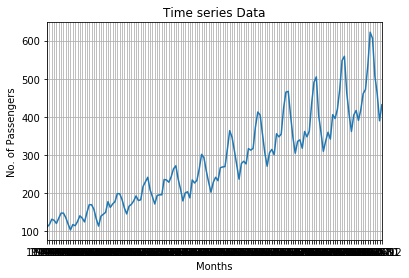

In [61]:
plt.title('Time series Data')
plt.ylabel('No. of Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data['Passengers'])

# b) Short-term : We can say that for short term in every 3 months the number of passengers decrease for 2 months and
#                 then again increase for next 3 months. 
#    Long term : Number of passengers increases with time.

# c) LSTM Network

In [5]:
# random number seed = 0
np.random.seed(0)

# convert integer to floating point values
data = df.values.astype('float64')
# data

In [6]:
#normalise the data to range (0,1)
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)
scaled_data.shape

(144, 1)

In [7]:
# splitting first 67% of the data as train data and 33% as test data

train_data, test_data= np.split(scaled_data, [int(.67 *len(scaled_data))])
print(train_data.shape, test_data.shape)

(96, 1) (48, 1)


In [8]:
# preparing dataset to be used in LSTM

def create_lstm_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
time_step = 1
x_train, y_train = create_lstm_dataset(train_data, time_step)
x_test, y_test = create_lstm_dataset(test_data, time_step)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(94, 1) (94,)
(46, 1) (46,)


In [10]:
print(x_train.shape)

(94, 1)


In [11]:
# Reshape the input data to be in the [samples, time steps, features] 
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(x_train.shape, x_test.shape)

(94, 1, 1) (46, 1, 1)


In [15]:
# LSTM Network
lstm_model = Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(1,1)))
lstm_model.add(LSTM(4))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 880       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 11,285
Trainable params: 11,285
Non-trainable params: 0
_________________________________________________________________


In [17]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
94/94 - 1s - loss: 0.0365
Epoch 2/100
94/94 - 0s - loss: 0.0149
Epoch 3/100
94/94 - 0s - loss: 0.0127
Epoch 4/100
94/94 - 0s - loss: 0.0104
Epoch 5/100
94/94 - 0s - loss: 0.0081
Epoch 6/100
94/94 - 0s - loss: 0.0056
Epoch 7/100
94/94 - 0s - loss: 0.0038
Epoch 8/100
94/94 - 0s - loss: 0.0027
Epoch 9/100
94/94 - 0s - loss: 0.0024
Epoch 10/100
94/94 - 0s - loss: 0.0024
Epoch 11/100
94/94 - 0s - loss: 0.0023
Epoch 12/100
94/94 - 0s - loss: 0.0022
Epoch 13/100
94/94 - 0s - loss: 0.0022
Epoch 14/100
94/94 - 0s - loss: 0.0024
Epoch 15/100
94/94 - 0s - loss: 0.0022
Epoch 16/100
94/94 - 0s - loss: 0.0022
Epoch 17/100
94/94 - 0s - loss: 0.0023
Epoch 18/100
94/94 - 0s - loss: 0.0025
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0023
Epoch 21/100
94/94 - 0s - loss: 0.0022
Epoch 22/100
94/94 - 0s - loss: 0.0023
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94

In [19]:
# prediction
x_train_pred = lstm_model.predict(x_train)
x_test_pred = lstm_model.predict(x_test)

In [ ]:
# print(x_test_pred)

In [20]:
# invert predictions to original data

x_train_inv = scaler.inverse_transform(x_train_pred)
Y_train = scaler.inverse_transform([y_train])

x_test_inv = scaler.inverse_transform(x_test_pred)
Y_test = scaler.inverse_transform([y_test])

In [22]:
# print(x_train_inv)
# print(Y_train)
# print(x_test_inv)
# print(Y_test)

[[113.54551 ]
 [119.0423  ]
 [132.07674 ]
 [129.26064 ]
 [121.81162 ]
 [134.90453 ]
 [147.2814  ]
 [147.2814  ]
 [135.84962 ]
 [119.96389 ]
 [106.30837 ]
 [119.0423  ]
 [116.28678 ]
 [126.456665]
 [140.59322 ]
 [134.90453 ]
 [125.52478 ]
 [148.24103 ]
 [168.5928  ]
 [168.5928  ]
 [156.92    ]
 [133.01807 ]
 [115.37142 ]
 [139.64214 ]
 [144.40862 ]
 [149.20166 ]
 [176.42393 ]
 [161.77121 ]
 [170.54741 ]
 [176.42393 ]
 [197.08847 ]
 [197.08847 ]
 [182.31618 ]
 [160.79944 ]
 [145.36517 ]
 [164.69078 ]
 [169.56982 ]
 [178.38649 ]
 [191.17499 ]
 [179.36835 ]
 [181.33324 ]
 [215.80455 ]
 [227.57597 ]
 [239.27368 ]
 [206.94536 ]
 [189.20482 ]
 [170.54741 ]
 [192.16031 ]
 [194.1313  ]
 [194.1313  ]
 [233.43579 ]
 [232.4606  ]
 [226.59741 ]
 [240.2443  ]
 [260.43765 ]
 [268.01907 ]
 [234.41042 ]
 [208.91557 ]
 [178.38649 ]
 [199.06013 ]
 [202.0176  ]
 [186.25104 ]
 [232.4606  ]
 [224.63887 ]
 [231.48479 ]
 [260.43765 ]
 [295.76447 ]
 [287.56424 ]
 [255.66576 ]
 [226.59741 ]
 [201.0318  ]
 [226.

In [24]:
# calculate root mean squared error = Actual value - Predicted value

trainScore = math.sqrt(mean_squared_error(Y_train[0], x_train_inv[:,0]))
print('Train Score RMSE: ', (round(trainScore, ndigits=2)))

testScore = math.sqrt(mean_squared_error(Y_test[0], x_test_inv[:,0]))
print('Test Score RMSE: ', (round(testScore, ndigits=2)))

Train Score RMSE:  23.07
Test Score RMSE:  57.73


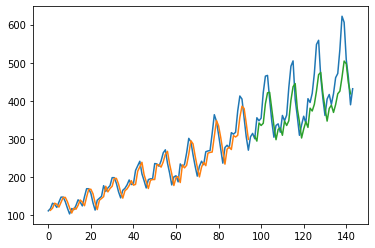

In [25]:
# shift train predictions for plotting
look_back=1
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(x_train_inv)+look_back, :] = x_train_inv
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(x_train_inv)+(look_back*2)+1:len(scaled_data)-1, :] = x_test_inv
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
# d) LSTM network using Keras to predict the next month’s value given this month and the previous two months,
# i.e., input size of 3

In [38]:
time_step = 3
x_train1, y_train1 = create_lstm_dataset(train_data, time_step)
x_test1, y_test1 = create_lstm_dataset(test_data, time_step)

In [39]:
x_train1.shape

(92, 3)

In [41]:
# reshape input to be [sample, time steps, features] which is required for LSTM
x_train1 =x_train1.reshape(x_train1.shape[0], 3, 1)
x_test1 = x_test1.reshape(x_test1.shape[0], 3, 1)

In [42]:
print(x_train1.shape, x_test1.shape)

(92, 3, 1) (44, 3, 1)


In [43]:
# LSTM Network
lstm_model1 = Sequential()
lstm_model1.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
lstm_model1.add(LSTM(4))
lstm_model1.add(Dense(1))
lstm_model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 4)                 880       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 11,285
Trainable params: 11,285
Non-trainable params: 0
_________________________________________________________________


In [45]:
lstm_model1.compile(loss='mean_squared_error', optimizer='adam')
lstm_model1.fit(x_train1, y_train1, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 2s - loss: 0.0219
Epoch 2/100
92/92 - 0s - loss: 0.0089
Epoch 3/100
92/92 - 0s - loss: 0.0062
Epoch 4/100
92/92 - 0s - loss: 0.0059
Epoch 5/100
92/92 - 0s - loss: 0.0055
Epoch 6/100
92/92 - 0s - loss: 0.0052
Epoch 7/100
92/92 - 0s - loss: 0.0058
Epoch 8/100
92/92 - 0s - loss: 0.0052
Epoch 9/100
92/92 - 0s - loss: 0.0054
Epoch 10/100
92/92 - 0s - loss: 0.0051
Epoch 11/100
92/92 - 0s - loss: 0.0053
Epoch 12/100
92/92 - 0s - loss: 0.0051
Epoch 13/100
92/92 - 0s - loss: 0.0055
Epoch 14/100
92/92 - 0s - loss: 0.0050
Epoch 15/100
92/92 - 0s - loss: 0.0052
Epoch 16/100
92/92 - 0s - loss: 0.0049
Epoch 17/100
92/92 - 0s - loss: 0.0046
Epoch 18/100
92/92 - 0s - loss: 0.0046
Epoch 19/100
92/92 - 1s - loss: 0.0045
Epoch 20/100
92/92 - 0s - loss: 0.0047
Epoch 21/100
92/92 - 0s - loss: 0.0044
Epoch 22/100
92/92 - 0s - loss: 0.0047
Epoch 23/100
92/92 - 0s - loss: 0.0042
Epoch 24/100
92/92 - 0s - loss: 0.0043
Epoch 25/100
92/92 - 0s - loss: 0.0040
Epoch 26/100
92/92 - 0s - loss: 0.

In [47]:
# prediction
x_train_pred1 = lstm_model1.predict(x_train1)
x_test_pred1 = lstm_model1.predict(x_test1)

In [48]:
# invert predictions to original data

x_train_inv1 = scaler.inverse_transform(x_train_pred1)
Y_train1 = scaler.inverse_transform([y_train1])

x_test_inv1 = scaler.inverse_transform(x_test_pred1)
Y_test1 = scaler.inverse_transform([y_test1])

In [49]:
# calculate root mean squared error = Actual value - Predicted value

trainScore1 = math.sqrt(mean_squared_error(Y_train1[0], x_train_inv1[:,0]))
print('Train Score RMSE: ', (round(trainScore1, ndigits=2)))

testScore1 = math.sqrt(mean_squared_error(Y_test1[0], x_test_inv1[:,0]))
print('Test Score RMSE: ', (round(testScore1, ndigits=2)))

Train Score RMSE:  26.21
Test Score RMSE:  94.16


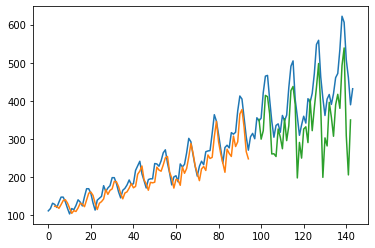

In [51]:
# shift train predictions for plotting
look_back=3
trainPredictPlot1 = np.empty_like(scaled_data)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(x_train_inv1)+look_back, :] = x_train_inv1
# shift test predictions for plotting
testPredictPlot1 = np.empty_like(scaled_data)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(x_train_inv1)+(look_back*2)+1:len(scaled_data)-1, :] = x_test_inv1
# plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot1)
plt.plot(testPredictPlot1)
plt.show()

In [52]:
# In the above graphs, original dataset is blue, the predictions for the training dataset is green, and 
# the predictions on the unseen test dataset is red